In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('salary_data_cleaned.csv')

In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'r_yn',
       'spark', 'aws', 'excel'],
      dtype='object')

In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manage' in title.lower():
        return 'manage'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
    
    
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr' in title.lower():
        return 'jr'
    else:
        return 'na'

In [6]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [7]:
df.job_simp.value_counts()

data scientist    279
na                182
data engineer     119
analyst           102
manage             24
mle                22
director           14
Name: job_simp, dtype: int64

In [8]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [9]:
#Fix state Los Angeles
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.job_state.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
IN     10
UT     10
AZ      9
MO      9
AL      8
DE      6
KY      6
GA      6
MI      6
CT      5
IA      5
NE      4
LA      4
OR      4
NM      3
KS      3
MN      2
ID      2
SC      1
RI      1
Name: job_state, dtype: int64

In [10]:
#Job description length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      2555
1      4828
2      3495
3      3926
4      2748
       ... 
737    6219
738    6167
739    3107
740    1678
741    3710
Name: desc_len, Length: 742, dtype: int64

In [11]:
#Competitor count
df['num_competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x !='-1' else 0)

In [12]:
df['Competitors']

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
737                           Pfizer, AstraZeneca, Merck
738                      See Tickets, TicketWeb, Vendini
739                                                   -1
740                                                   -1
741                                                   -1
Name: Competitors, Length: 742, dtype: object

In [13]:
#hourly wage to annual

df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis = 1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis = 1)


In [14]:
df[df.hourly == 1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [15]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n',''))

In [16]:
df['company_txt']

0                          Tecolote Research\r
1      University of Maryland Medical System\r
2                                    KnowBe4\r
3                                       PNNL\r
4                         Affinity Solutions\r
                        ...                   
737                                      GSK\r
738                               Eventbrite\r
739           Software Engineering Institute\r
740                             Numeric, LLC\r
741             Riverside Research Institute\r
Name: company_txt, Length: 742, dtype: object

In [17]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'r_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_competitors'],
      dtype='object')

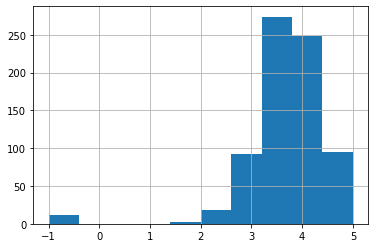

In [18]:
df.Rating.hist()

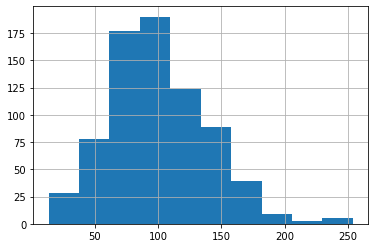

In [19]:
df.avg_salary.hist()

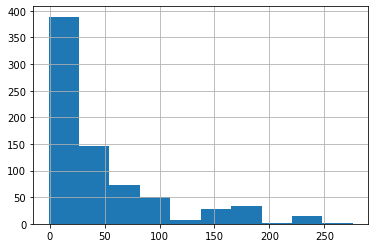

In [20]:
df.age.hist()

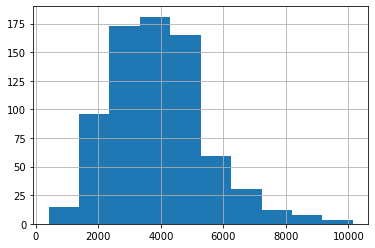

In [21]:
df.desc_len.hist()

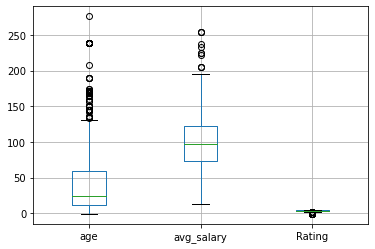

In [22]:
df.boxplot(column = ['age','avg_salary', 'Rating'])

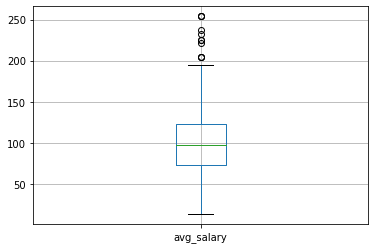

In [23]:
df.boxplot(column = ['avg_salary'])

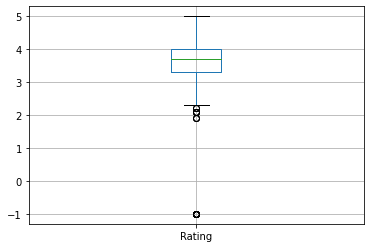

In [24]:
df.boxplot(column = ['Rating'])

In [25]:
df[['age','avg_salary','Rating','desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,0.019655,0.021655,0.165090
avg_salary,0.019655,1.000000,0.013492,0.078093
Rating,0.021655,0.013492,1.000000,-0.012631
desc_len,0.165090,0.078093,-0.012631,1.000000


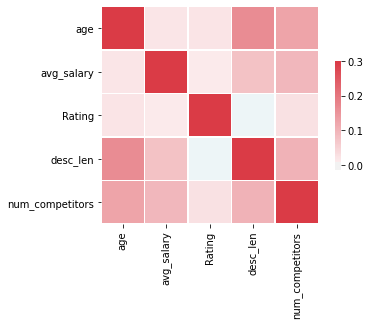

In [26]:
cmap = sns.diverging_palette(220,10,as_cmap = True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len','num_competitors']].corr(),vmax =.3, center = 0, cmap=cmap, square =True, linewidths =.5, cbar_kws={"shrink":.5})

In [27]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'r_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_competitors'],
      dtype='object')

In [28]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector','Revenue','company_txt', 'job_state','spark', 'aws', 'excel', 'job_simp', 'seniority','avg_salary']]

Graph for Location: total = 200


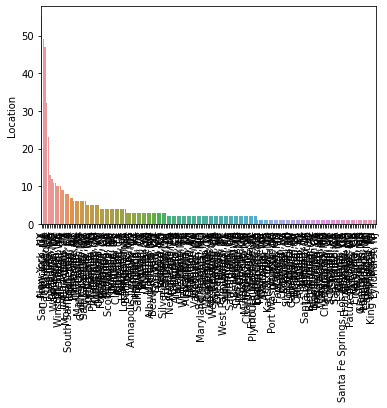

Graph for Headquarters: total = 198


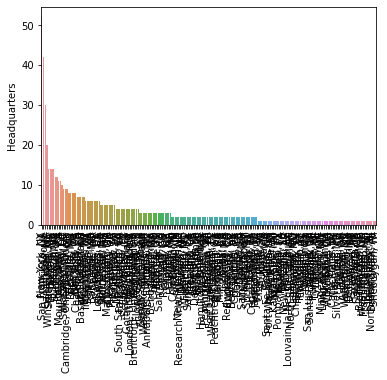

Graph for Size: total = 9


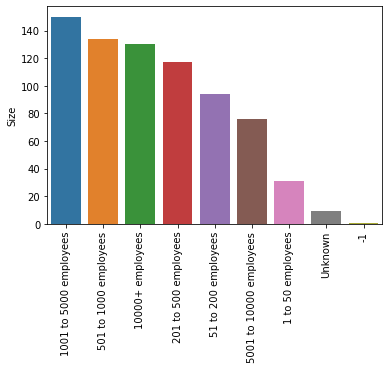

Graph for Type of ownership: total = 11


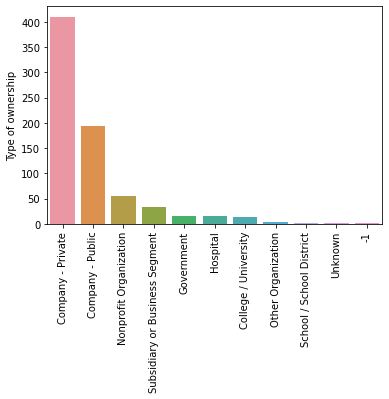

Graph for Industry: total = 60


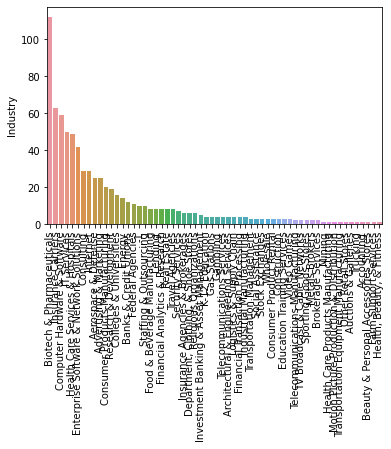

Graph for Sector: total = 25


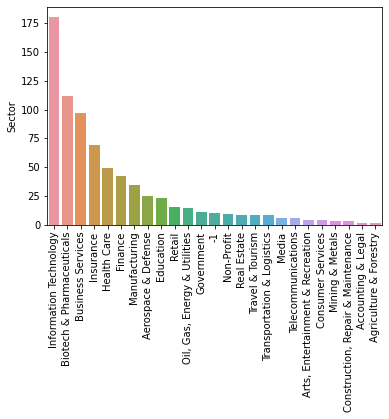

Graph for Revenue: total = 14


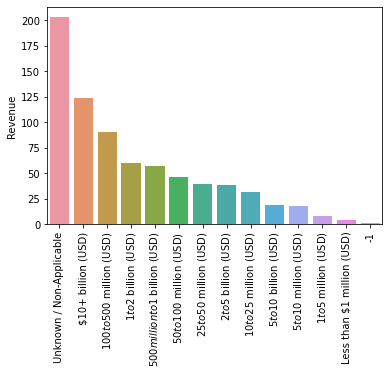

Graph for company_txt: total = 343


D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


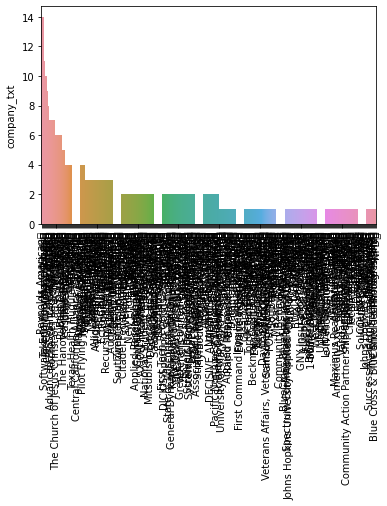

Graph for job_state: total = 37


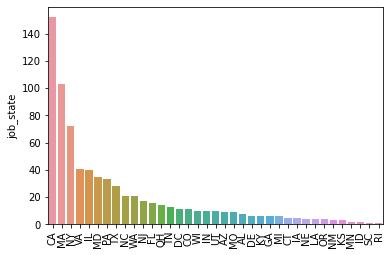

Graph for spark: total = 2


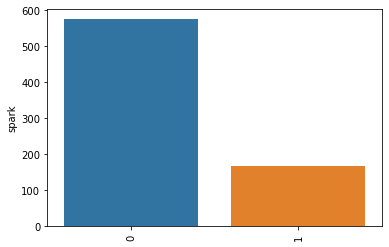

Graph for aws: total = 2


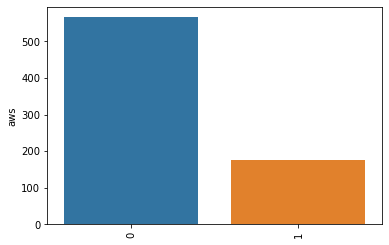

Graph for excel: total = 2


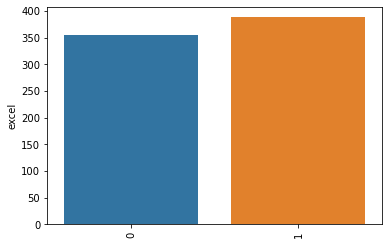

Graph for job_simp: total = 7


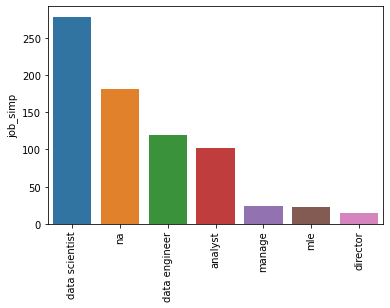

Graph for seniority: total = 3


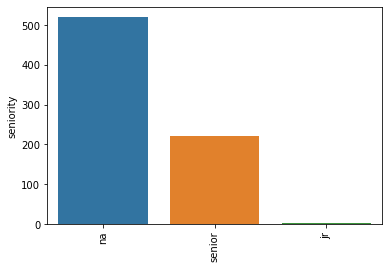

Graph for avg_salary: total = 225


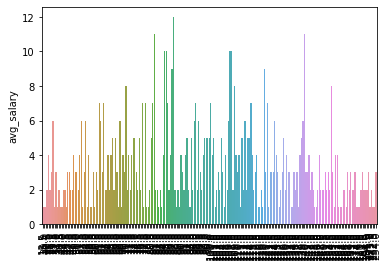

In [29]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("Graph for %s: total = %d" %(i,(len(cat_num))))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

Graph for Location: total = 20


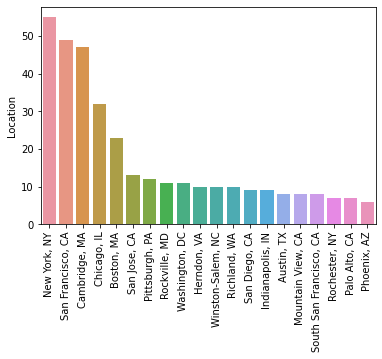

Graph for Headquarters: total = 20


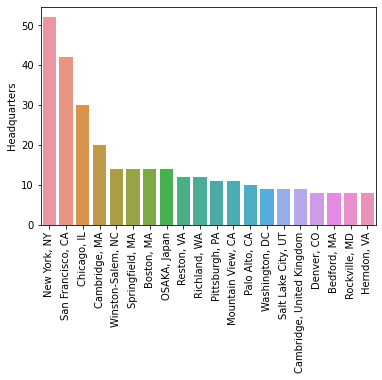

Graph for company_txt: total = 20


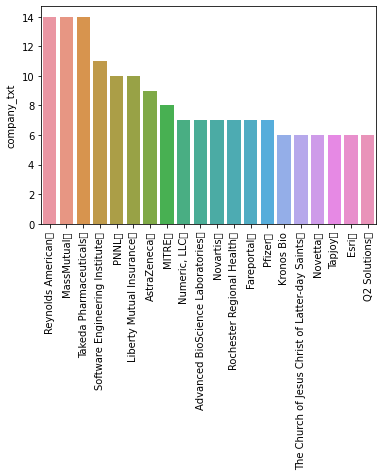

In [30]:
for i in df_cat[['Location', 'Headquarters','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("Graph for %s: total = %d" %(i,(len(cat_num))))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

In [31]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'r_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_competitors'],
      dtype='object')

In [32]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')

,avg_salary
job_simp,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manage,83.125000
mle,126.431818
na,84.980769


In [33]:
pd.pivot_table(df, index = ['job_simp','seniority'],values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        jr          56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manage         na          82.456522
               senior      98.500000
mle            na         119.133333
               senior     142.071429
na             na          74.194444
               senior     109.250000

In [34]:
pd.options.display.max_rows
pd.set_option('display.max_rows',None)

In [35]:
pd.pivot_table(df, index = ['job_state', 'job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('avg_salary', ascending = False)

avg_salary
job_state job_simp                  
CA        data scientist          68
MA        na                      46
NY        data scientist          40
MA        data scientist          30
CA        na                      26
          data engineer           25
VA        data scientist          18
CA        analyst                 18
WA        data scientist          17
MD        na                      16
IL        data scientist          15
NY        analyst                 14
MD        data scientist          13
TX        data scientist          13
NY        na                      12
NC        na                      12
MA        data engineer           12
CA        manage                  10
VA        data engineer           10
TN        data engineer           10
IL        data engineer            8
PA        analyst                  8
          na                       8
TX        data engineer            8
FL        data scientist           7
TX        na                       7
PA        mle                      7
OH        data scientist           7
NJ        analyst                  6
NC        data engineer            6
PA        data scientist           6
FL        analyst                  6
MA        director                 6
DE        na                       6
VA        analyst                  6
IL        director                 6
          na                       6
MA        manage                   5
VA        na                       5
AL        analyst                  5
DC        data scientist           5
AZ        data engineer            5
CA        mle                      5
MI        data scientist           4
UT        analyst                  4
OH        analyst                  4
DC        data engineer            4
NY        data engineer            4
IN        na                       4
NJ        data scientist           4
NE        na                       4
WI        na                       4
MA        analyst                  4
KY        na                       4
IN        data engineer            4
CT        na                       3
GA        na                       3
OR        data scientist           3
CO        na                       3
PA        manage                   3
CO        data scientist           3
NM        data scientist           3
CO        data engineer            3
FL        data engineer            3
OH        na                       3
NC        data scientist           3
GA        data scientist           3
MO        na                       3
UT        data engineer            3
MD        analyst                  3
          data engineer            3
WI        data scientist           3
          analyst                  3
IL        analyst                  3
WA        analyst                  3
IA        data engineer            3
KS        mle                      3
UT        data scientist           3
MO        data scientist           3
VA        mle                      2
AZ        na                       2
CT        data scientist           2
KY        data scientist           2
TN        analyst                  2
ID        analyst                  2
NJ        data engineer            2
          manage                   2
IA        analyst                  2
MI        manage                   2
MO        analyst                  2
IL        mle                      2
NJ        director                 2
IN        data scientist           2
DC        analyst                  2
LA        data engineer            2
NY        mle                      2
RI        analyst                  1
MN        data engineer            1
AL        data engineer            1
WA        na                       1
AL        manage                   1
PA        data engineer            1
AL        na                       1
MN        analyst                  1
AZ        analyst                  1
          data scientist           1
SC        na                  

In [36]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [37]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'r_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_competitors'],
      dtype='object')

In [38]:
df_pivots = df[['Rating','Industry', 'Sector', 'Revenue','num_competitors','hourly', 'employer_provided','python_yn', 'r_yn',
       'spark', 'aws', 'excel','desc_len','Type of ownership','avg_salary']]

In [39]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index = i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [41]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_salary',aggfunc ='count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [42]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

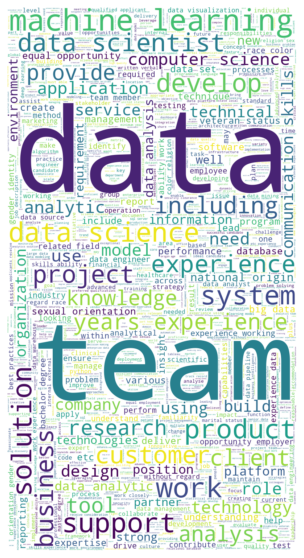

In [43]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    #removes punctuation and stop words
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered
    
words_filtered = punctuation_stop(words)

text = ' '.join([ele for ele in words_filtered])

wc = WordCloud(background_color = "white", random_state = 1, stopwords = STOPWORDS, max_words = 2000, width = 800, height = 1500) 
wc.generate(text)

plt.figure(figsize = [10,10])
plt.imshow(wc,interpolation = "bilinear")
plt.axis('off')
plt.show()

In [44]:
df.to_csv('eda_data.csv')